In [2]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.errors import NodeInterrupt
from IPython.display import Image, display

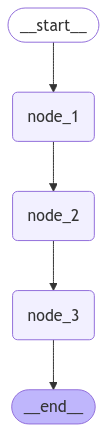

In [3]:
class State(TypedDict):
    input: str

# Nodes
def node_1(state:State):
    print("---Node 1 ---")
    return state

def node_2(state: State):
    print("--- Node 2 ---")
    if len(state["input"]) >5:
        raise NodeInterrupt(f"Recieved longer input.{state['input']}")

def node_3(state: State):
    print("--- Node 3---")
    return state

builder  = StateGraph(State)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

memory  = MemorySaver()
graph = builder.compile(checkpointer=memory)

# Graph Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:

config = {"configurable":{"thread_id":"1"}}
initial_input = {"input": "Hello Narcy"}
for event in graph.stream(initial_input, config, stream_mode="values"):
    print(event)

{'input': 'Hello Narcy'}
---Node 1 ---
{'input': 'Hello Narcy'}
--- Node 2 ---


[StateSnapshot(values={'input': 'Hello Narcy'}, next=('node_2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efeddcd-b70b-6619-8001-5fe096cbff72'}}, metadata={'source': 'loop', 'writes': {'node_1': {'input': 'Hello Narcy'}}, 'thread_id': '1', 'step': 1, 'parents': {}}, created_at='2025-02-18T09:43:50.195934+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efeddcd-b706-64bf-8000-172c1172377f'}}, tasks=(PregelTask(id='7cc60047-7ce6-a240-3bba-e43c4d2d8bc0', name='node_2', path=('__pregel_pull', 'node_2'), error=None, interrupts=(Interrupt(value='Recieved longer input.Hello Narcy', resumable=False, ns=None, when='during'),), state=None, result=None),)),
 StateSnapshot(values={'input': 'Hello Narcy'}, next=('node_1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efeddcd-b706-64bf-8000-172c1172377f'}}, metadata={'source': 'loop', 'writes': None, 'thread_id': '1', 's

In [40]:
# Previously use method, passing None as input
for event in graph.stream(None, config, stream_mode="values"):
    print(event)

{'input': 'Hello Narcy'}
--- Node 2 ---


In [47]:
# Updating graph state with new input
graph.update_state(
    config,
    {"input":"Hell"}
)


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efeddb9-7029-6899-8008-6f41bf6e732d'}}

In [1]:
# Passing None as always tp continue the state where it left off!
for event in graph.stream(None, config, stream_mode="values"):
    print(event)

NameError: name 'graph' is not defined